In [1]:
from utils import prepare_activations

/Users/jonathanlamontange-kratz/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [ ]:
score_plots = list(map(list, zip(*[1, 2, 3, 4])))
print(len(score_plots))

In [ ]:
import numpy as np
arr = np.empty((1, 1), dtype=np.int32)
print(arr)  
arr = np.append(arr, [[1, 1, 1],[1, 1, 1],[1, 1, 1]], axis=0)
print(arr)
arr = np.append(arr, [[1, 1, 1],[1, 1, 1],[1, 1, 1]], axis=0)
print(arr)

In [ ]:
import custom_gym_envs
import gymnasium as gym
import random
env = gym.make('custom_gym_envs/MississippiMarbles-v0', render_mode="human")
state, info = env.reset()
for _ in range(1000):
    action = random.choice(info['legal_moves'])
    state, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        break

In [ ]:
# import gym_envs
# import gymnasium as gym
# env = gym.make('gym_envs/TicTacToe-v0')

# state, info = env.reset()
# print(state)
# print("Turn: ", state[2][0][0])
# print("Legal moves: ", info['legal_moves'])
# env.render()
# state, reward, terminated, truncated, info = env.step(0)
# print(state)
# print("Turn: ", state[2][0][0])
# print("Legal moves: ", info['legal_moves'])
# print("Terminated:", terminated)
# env.render()
# state, reward, terminated, truncated, info = env.step(4)
# print(state)
# print("Turn: ", state[2][0][0])
# print("Legal moves: ", info['legal_moves'])
# print("Terminated:", terminated)
# env.render()
# state, reward, terminated, truncated, info = env.step(3)
# print(state)
# print("Turn: ", state[2][0][0])
# print("Legal moves: ", info['legal_moves'])
# print("Terminated:", terminated)
# env.render()
# state, reward, terminated, truncated, info = env.step(6)
# print(state)
# print("Turn: ", state[2][0][0])
# print("Legal moves: ", info['legal_moves'])
# print("Terminated:", terminated)
# env.render()
# state, reward, terminated, truncated, info = env.step(2)
# print(state)
# print("Turn: ", state[2][0][0])
# print("Legal moves: ", info['legal_moves'])
# print("Terminated:", terminated)
# env.render()
# state, reward, terminated, truncated, info = env.step(1)
# print(state)
# print("Turn: ", state[2][0][0])
# print("Legal moves: ", info['legal_moves'])
# print("Terminated:", terminated)
# env.render()
# state, reward, terminated, truncated, info = env.step(7)
# print(state)
# print("Turn: ", state[2][0][0])
# print("Legal moves: ", info['legal_moves'])
# print("Terminated:", terminated)
# state, reward, terminated, truncated, info = env.step(8)
# print(state)
# print("Turn: ", state[2][0][0])
# print("Legal moves: ", info['legal_moves'])
# print("Terminated:", terminated)
# state, reward, terminated, truncated, info = env.step(5)
# print(state)
# print("Turn: ", state[2][0][0])
# print("Legal moves: ", info['legal_moves'])
# print("Terminated:", terminated)
# print("Truncated:", truncated)
# env.render()


# env.reset()
# state, reward, terminated, truncated, info = env.step(0)
# print(state)
# print("Turn: ", state[2][0][0])
# print("Legal moves: ", info['legal_moves'])
# print("Terminated:", terminated)
# state, reward, terminated, truncated, info = env.step(3)
# print(state)
# print("Turn: ", state[2][0][0])
# print("Legal moves: ", info['legal_moves'])
# print("Terminated:", terminated)
# state, reward, terminated, truncated, info = env.step(7)
# print(state)
# print("Turn: ", state[2][0][0])
# print("Legal moves: ", info['legal_moves'])
# print("Terminated:", terminated)
# state, reward, terminated, truncated, info = env.step(4)
# print(state)
# print("Turn: ", state[2][0][0])
# print("Legal moves: ", info['legal_moves'])
# print("Terminated:", terminated)
# state, reward, terminated, truncated, info = env.step(2)
# print(state)
# print("Turn: ", state[2][0][0])
# print("Legal moves: ", info['legal_moves'])
# print("Terminated:", terminated)
# state, reward, terminated, truncated, info = env.step(6)
# print(state)
# print("Turn: ", state[2][0][0])
# print("Legal moves: ", info['legal_moves'])
# print("Terminated:", terminated)
# state, reward, terminated, truncated, info = env.step(1)
# print(state)
# print("Turn: ", state[2][0][0])
# print("Legal moves: ", info['legal_moves'])
# print("Terminated:", terminated)
# print("Truncated:", truncated)
# print("Reward:", reward)



In [ ]:
class NormalizeZeroToOne(gym.ObservationWrapper):
    def __init__(self, env):
        super().__init__(env)
        self.observation_high = self.env.observation_space.high
        self.observation_low = self.env.observation_space.low

    def observation(self, obs):
        print(obs)
        print((obs - self.observation_low) / (self.observation_high - self.observation_low))
        return (obs - self.observation_low) / (self.observation_high - self.observation_low)

In [ ]:
class ClipReward(gym.RewardWrapper):
    def __init__(self, env, min_reward, max_reward):
        super().__init__(env)
        self.min_reward = min_reward
        self.max_reward = max_reward
        self.reward_range = (min_reward, max_reward)

    def reward(self, reward):
        return np.clip(reward, self.min_reward, self.max_reward)

In [ ]:
# env = gym.wrappers.AtariPreprocessing(gym.make("ALE/MsPacman-v5", render_mode="rgb_array"), terminal_on_life_loss=True, scale_obs=True) # as seen online with frame stackign though
# env = gym.wrappers.AtariPreprocessing(gym.make("ALE/MsPacman-v5", render_mode="rgb_array"), terminal_on_life_loss=True, scale_obs=True) # as seen online
env = ClipReward(gym.wrappers.AtariPreprocessing(gym.make("MsPacmanNoFrameskip-v4", render_mode="rgb_array"), terminal_on_life_loss=True), -1, 1) # as recommended by the original paper, should already include max pooling
env = gym.wrappers.FrameStack(env, 4)

In [1]:
from rainbow_agent import RainbowAgent
import gymnasium as gym
import numpy as np
import tensorflow as tf
from hyperopt import hp

/Users/jonathanlamontange-kratz/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


1 Physical GPUs, 1 Logical GPUs


2024-05-22 01:59:26.995371: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-05-22 01:59:26.995396: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-05-22 01:59:26.995401: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-05-22 01:59:26.995436: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-22 01:59:26.995457: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [2]:
def create_search_space():
    search_space = {
        "activation": hp.choice(
            "activation",
            [
                "linear",
                "relu",
                # 'relu6',
                "sigmoid",
                "softplus",
                "soft_sign",
                "silu",
                "swish",
                "log_sigmoid",
                "hard_sigmoid",
                # 'hard_silu',
                # 'hard_swish',
                # 'hard_tanh',
                "elu",
                # 'celu',
                "selu",
                "gelu",
                # 'glu'
            ],
        ),
        "kernel_initializer": hp.choice(
            "kernel_initializer",
            [
                "he_uniform",
                "he_normal",
                "glorot_uniform",
                "glorot_normal",
                "lecun_uniform",
                "lecun_normal",
                "orthogonal",
                "variance_baseline",
                "variance_0.1",
                "variance_0.3",
                "variance_0.8",
                "variance_3",
                "variance_5",
                "variance_10",
            ],
        ),
        "optimizer": hp.choice(
            "optimizer", [tf.keras.optimizers.legacy.Adam]
        ),  # NO SGD OR RMSPROP FOR NOW SINCE IT IS FOR RAINBOW DQN
        "learning_rate": hp.choice(
            "learning_rate", [10, 5, 2, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
        ),  #
        "adam_epsilon": hp.choice(
            "adam_epsilon",
            [1, 0.5, 0.3125, 0.03125, 0.003125, 0.0003125, 0.00003125, 0.000003125],
        ),
        "clipnorm": hp.choice("clipnorm", [None]),
        # NORMALIZATION?
        "soft_update": hp.choice(
            "soft_update", [False]
        ),  # seems to always be false, we can try it with tru
        "ema_beta": hp.uniform("ema_beta", 0.95, 0.999),
        "transfer_interval": hp.choice(
            "transfer_interval", [10, 25, 50, 100, 200, 400, 800, 1600, 2000]
        ),
        "replay_interval": hp.choice("replay_interval", [1, 2, 3, 4, 5, 8, 10, 12, 350]),
        "minibatch_size": hp.choice(
            "minibatch_size", [2**i for i in range(0, 8)]
        ),  ###########
        "replay_buffer_size": hp.choice(
            "replay_buffer_size", [2000, 3000, 5000, 7500, 10000, 15000, 20000, 25000, 50000]
        ),  #############
        "min_replay_buffer_size": hp.choice(
            "min_replay_buffer_size", [0, 125, 250, 375, 500, 625, 750, 875, 1000, 1500, 2000]
        ),  # 125, 250, 375, 500, 625, 750, 875, 1000, 1500, 2000
        "n_step": hp.choice("n_step", [1, 2, 3, 4, 5, 8, 10]),
        "discount_factor": hp.choice(
            "discount_factor", [0.1, 0.5, 0.9, 0.99, 0.995, 0.999]
        ),
        "atom_size": hp.choice("atom_size", [11, 21, 31, 41, 51, 61, 71, 81]),  #
        "conv_layers": hp.choice("conv_layers", [[], [(32, 8, 4), (64, 4, 2), (64, 3, 1)]]),
        "conv_layers_noisy": hp.choice("conv_layers_noisy", [False]),
        "width": hp.choice("width", [32, 64, 128, 256, 512, 1024]),
        "dense_layers": hp.choice("dense_layers", [0, 1, 2, 3, 4]),
        "dense_layers_noisy": hp.choice(
            "dense_layers_noisy", [True]
        ),  # i think this is always true for rainbow
        # REWARD CLIPPING
        "noisy_sigma": hp.choice("noisy_sigma", [0.5]),  #
        "loss_function": hp.choice(
            "loss_function",
            [tf.keras.losses.CategoricalCrossentropy(), tf.keras.losses.KLDivergence()],
        ),
        "dueling": hp.choice("dueling", [True]),
        "advantage_hidden_layers": hp.choice(
            "advantage_hidden_layers", [0, 1, 2, 3, 4]
        ),  #
        "value_hidden_layers": hp.choice("value_hidden_layers", [0, 1, 2, 3, 4]),  #
        "training_steps": hp.choice("training_steps", [30000]),
        "per_epsilon": hp.choice(
            "per_epsilon", [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
        ),
        "per_alpha": hp.choice("per_alpha", [0.05 * i for i in range(0, 21)]),
        "per_beta": hp.choice("per_beta", [0.05 * i for i in range(1, 21)]),
        # 'per_beta_increase': hp.uniform('per_beta_increase', 0, 0.015),
        # 'search_max_depth': 5,
        # 'search_max_time': 10,
        "training_iterations": hp.choice("training_iterations", [1, 2, 3, 4, 5]),
        "num_minibatches": hp.choice("num_minibatches", [1, 2, 3, 4, 5]),
    }
    initial_best_config = [
        {
            "activation": 1,
            "kernel_initializer": 6,
            "optimizer": 0,  # NO SGD OR RMSPROP FOR NOW SINCE IT IS FOR RAINBOW DQN
            "learning_rate": 5,  #
            "adam_epsilon": 5,
            "clipnorm": 0,
            # NORMALIZATION?
            "soft_update": 0,  # seems to always be false, we can try it with tru
            "ema_beta": 0.95,
            "transfer_interval": 3,
            "replay_interval": 1,
            "minibatch_size": 7,
            "replay_buffer_size": 8,  
            "min_replay_buffer_size": 4,
            "n_step": 2,
            "discount_factor": 3,
            "atom_size": 4,  #
            "conv_layers": 0,
            "conv_layers_noisy": 0,
            "width": 4,
            "dense_layers": 2,
            "dense_layers_noisy": 0,  # i think this is always true for rainbow
            # REWARD CLIPPING
            "noisy_sigma": 0,  #
            "loss_function": 0,
            "dueling": 0,
            "advantage_hidden_layers": 0,  #
            "value_hidden_layers": 0,  #
            "training_steps": 0,
            "per_epsilon": 3,
            "per_alpha": 10,
            "per_beta": 7,
            # 'per_beta_increase': hp.uniform('per_beta_increase', 0, 0.015),
            # 'search_max_depth': 5,
            # 'search_max_time': 10,
            "training_iterations": 0,
            "num_minibatches": 0,
        }
    ]

    return search_space, initial_best_config


In [3]:
from hyperopt import space_eval

search_sapce, initial_best_config = create_search_space()
config = space_eval(search_sapce, initial_best_config[0])
print(config)


{'activation': 'relu', 'adam_epsilon': 0.0003125, 'advantage_hidden_layers': 0, 'atom_size': 51, 'clipnorm': None, 'conv_layers': (), 'conv_layers_noisy': False, 'dense_layers': 2, 'dense_layers_noisy': True, 'discount_factor': 0.99, 'dueling': True, 'ema_beta': 0.95, 'kernel_initializer': 'orthogonal', 'learning_rate': 0.01, 'loss_function': <keras.src.losses.CategoricalCrossentropy object at 0x29cd8d790>, 'min_replay_buffer_size': 500, 'minibatch_size': 128, 'n_step': 3, 'noisy_sigma': 0.5, 'num_minibatches': 1, 'optimizer': <class 'keras.src.optimizers.legacy.adam.Adam'>, 'per_alpha': 0.5, 'per_beta': 0.4, 'per_epsilon': 0.001, 'replay_buffer_size': 50000, 'replay_interval': 2, 'soft_update': False, 'training_iterations': 1, 'training_steps': 30000, 'transfer_interval': 100, 'value_hidden_layers': 0, 'width': 512}


In [4]:
env = gym.make('CartPole-v1', render_mode="rgb_array")

Using default save_intermediate_weights: True
Using adam_epsilon: 0.0003125
Using learning_rate: 0.01
Using clipnorm: None
Using optimizer: <class 'keras.src.optimizers.legacy.adam.Adam'>
Using loss_function: <keras.src.losses.CategoricalCrossentropy object at 0x29cd8d790>
Using training_iterations: 1
Using num_minibatches: 1
Using minibatch_size: 128
Using replay_buffer_size: 50000
Using min_replay_buffer_size: 500
Using training_steps: 30000
Using activation: relu
Using kernel_initializer: orthogonal
Using width: 512
Using noisy_sigma: 0.5
Using conv_layers: ()
Using conv_layers_noisy: False
Using dense_layers: 2
Using dense_layers_noisy: True
Using value_hidden_layers: 0
Using advantage_hidden_layers: 0
Using discount_factor: 0.99
Using soft_update: False
Using transfer_interval: 100
Using ema_beta: 0.95
Using replay_interval: 2
Using per_alpha: 0.5
Using per_beta: 0.4
Using per_epsilon: 0.001
Using n_step: 3
Using atom_size: 51
observation_dimensions:  (4,)
num_actions:  2


/Users/jonathanlamontange-kratz/Library/Python/3.9/lib/python/site-packages/gymnasium/wrappers/record_video.py:94: UserWarning: WARN: Overwriting existing videos at /Users/jonathanlamontange-kratz/Documents/GitHub/rl-stuff/rainbow/videos/RainbowDQN-CartPole-v1 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
/Users/jonathanlamontange-kratz/Library/Python/3.9/lib/python/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


score:  11.0
score:  13.0
score:  12.0
score:  11.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/10/RainbowDQN-CartPole-v1-episode-4.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/10/RainbowDQN-CartPole-v1-episode-4.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/10/RainbowDQN-CartPole-v1-episode-4.mp4
score:  13.0


score:  13.0
score:  12.0
score:  12.0
score:  12.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/20/RainbowDQN-CartPole-v1-episode-9.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/20/RainbowDQN-CartPole-v1-episode-9.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/20/RainbowDQN-CartPole-v1-episode-9.mp4
score:  14.0


score:  15.0
score:  63.0
score:  14.0
score:  13.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/30/RainbowDQN-CartPole-v1-episode-14.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/30/RainbowDQN-CartPole-v1-episode-14.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/30/RainbowDQN-CartPole-v1-episode-14.mp4
score:  13.0


score:  78.0
score:  71.0
score:  70.0
score:  83.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/40/RainbowDQN-CartPole-v1-episode-19.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/40/RainbowDQN-CartPole-v1-episode-19.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/40/RainbowDQN-CartPole-v1-episode-19.mp4
score:  75.0


score:  69.0
score:  71.0
score:  70.0
score:  72.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/50/RainbowDQN-CartPole-v1-episode-24.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/50/RainbowDQN-CartPole-v1-episode-24.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/50/RainbowDQN-CartPole-v1-episode-24.mp4
score:  69.0


score:  9.0
score:  8.0
score:  10.0
score:  9.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/60/RainbowDQN-CartPole-v1-episode-29.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/60/RainbowDQN-CartPole-v1-episode-29.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/60/RainbowDQN-CartPole-v1-episode-29.mp4
score:  9.0


score:  50.0
score:  52.0
score:  48.0
score:  50.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/70/RainbowDQN-CartPole-v1-episode-34.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/70/RainbowDQN-CartPole-v1-episode-34.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/70/RainbowDQN-CartPole-v1-episode-34.mp4
score:  52.0


score:  10.0
score:  10.0
score:  37.0
score:  44.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/80/RainbowDQN-CartPole-v1-episode-39.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/80/RainbowDQN-CartPole-v1-episode-39.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/80/RainbowDQN-CartPole-v1-episode-39.mp4
score:  44.0


score:  52.0
score:  51.0
score:  50.0
score:  48.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/90/RainbowDQN-CartPole-v1-episode-44.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/90/RainbowDQN-CartPole-v1-episode-44.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/90/RainbowDQN-CartPole-v1-episode-44.mp4
score:  54.0


score:  47.0
score:  12.0
score:  15.0
score:  41.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/100/RainbowDQN-CartPole-v1-episode-49.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/100/RainbowDQN-CartPole-v1-episode-49.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/100/RainbowDQN-CartPole-v1-episode-49.mp4
score:  12.0
score:  55.0
score:  59.0
score:  65.0
score:  56.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/110/RainbowDQN-CartPole-v1-episode-54.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/110/RainbowDQN-CartPole-v1-episode-54.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/110/RainbowDQN-CartPole-v1-episode-54.mp4
score:  53.0


score:  75.0
score:  78.0
score:  78.0
score:  79.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/120/RainbowDQN-CartPole-v1-episode-59.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/120/RainbowDQN-CartPole-v1-episode-59.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/120/RainbowDQN-CartPole-v1-episode-59.mp4
score:  81.0


score:  70.0
score:  74.0
score:  74.0
score:  74.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/130/RainbowDQN-CartPole-v1-episode-64.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/130/RainbowDQN-CartPole-v1-episode-64.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/130/RainbowDQN-CartPole-v1-episode-64.mp4
score:  64.0


score:  66.0
score:  69.0
score:  69.0
score:  78.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/140/RainbowDQN-CartPole-v1-episode-69.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/140/RainbowDQN-CartPole-v1-episode-69.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/140/RainbowDQN-CartPole-v1-episode-69.mp4
score:  72.0


score:  80.0
score:  70.0
score:  74.0
score:  76.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/150/RainbowDQN-CartPole-v1-episode-74.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/150/RainbowDQN-CartPole-v1-episode-74.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/150/RainbowDQN-CartPole-v1-episode-74.mp4
score:  65.0
score:  81.0
score:  81.0
score:  93.0
score:  87.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/160/RainbowDQN-CartPole-v1-episode-79.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/160/RainbowDQN-CartPole-v1-episode-79.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/160/RainbowDQN-CartPole-v1-episode-79.mp4
score:  87.0
score:  93.0
score:  84.0
score:  88.0
score:  87.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/170/RainbowDQN-CartPole-v1-episode-84.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/170/RainbowDQN-CartPole-v1-episode-84.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/170/RainbowDQN-CartPole-v1-episode-84.mp4
score:  90.0
score:  91.0
score:  110.0
score:  102.0
score:  95.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/180/RainbowDQN-CartPole-v1-episode-89.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/180/RainbowDQN-CartPole-v1-episode-89.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/180/RainbowDQN-CartPole-v1-episode-89.mp4
score:  98.0
score:  88.0
score:  87.0
score:  94.0
score:  96.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/190/RainbowDQN-CartPole-v1-episode-94.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/190/RainbowDQN-CartPole-v1-episode-94.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/190/RainbowDQN-CartPole-v1-episode-94.mp4
score:  88.0


score:  114.0
score:  99.0
score:  100.0
score:  117.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/200/RainbowDQN-CartPole-v1-episode-99.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/200/RainbowDQN-CartPole-v1-episode-99.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/200/RainbowDQN-CartPole-v1-episode-99.mp4
score:  101.0
score:  96.0
score:  102.0
score:  113.0
score:  102.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/210/RainbowDQN-CartPole-v1-episode-104.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/210/RainbowDQN-CartPole-v1-episode-104.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/210/RainbowDQN-CartPole-v1-episode-104.mp4
score:  97.0
score:  126.0
score:  110.0
score:  122.0
score:  94.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/220/RainbowDQN-CartPole-v1-episode-109.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/220/RainbowDQN-CartPole-v1-episode-109.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/220/RainbowDQN-CartPole-v1-episode-109.mp4
score:  112.0
score:  94.0
score:  101.0
score:  102.0
score:  114.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/230/RainbowDQN-CartPole-v1-episode-114.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/230/RainbowDQN-CartPole-v1-episode-114.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/230/RainbowDQN-CartPole-v1-episode-114.mp4
score:  99.0
score:  121.0
score:  118.0
score:  109.0
score:  123.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/240/RainbowDQN-CartPole-v1-episode-119.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/240/RainbowDQN-CartPole-v1-episode-119.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/240/RainbowDQN-CartPole-v1-episode-119.mp4
score:  106.0
score:  126.0
score:  109.0
score:  102.0
score:  102.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/250/RainbowDQN-CartPole-v1-episode-124.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/250/RainbowDQN-CartPole-v1-episode-124.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/250/RainbowDQN-CartPole-v1-episode-124.mp4
score:  126.0
score:  102.0
score:  104.0
score:  96.0
score:  106.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/260/RainbowDQN-CartPole-v1-episode-129.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/260/RainbowDQN-CartPole-v1-episode-129.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/260/RainbowDQN-CartPole-v1-episode-129.mp4
score:  115.0
score:  92.0
score:  98.0
score:  91.0
score:  98.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/270/RainbowDQN-CartPole-v1-episode-134.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/270/RainbowDQN-CartPole-v1-episode-134.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/270/RainbowDQN-CartPole-v1-episode-134.mp4
score:  94.0
score:  118.0
score:  112.0
score:  129.0
score:  110.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/280/RainbowDQN-CartPole-v1-episode-139.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/280/RainbowDQN-CartPole-v1-episode-139.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/280/RainbowDQN-CartPole-v1-episode-139.mp4
score:  108.0
score:  93.0
score:  100.0
score:  100.0
score:  95.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/290/RainbowDQN-CartPole-v1-episode-144.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/290/RainbowDQN-CartPole-v1-episode-144.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/290/RainbowDQN-CartPole-v1-episode-144.mp4


score:  88.0
score:  124.0
score:  128.0
score:  140.0
score:  116.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/300/RainbowDQN-CartPole-v1-episode-149.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/300/RainbowDQN-CartPole-v1-episode-149.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/300/RainbowDQN-CartPole-v1-episode-149.mp4
score:  119.0
score:  117.0
score:  104.0
score:  124.0
score:  102.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/310/RainbowDQN-CartPole-v1-episode-154.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/310/RainbowDQN-CartPole-v1-episode-154.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/310/RainbowDQN-CartPole-v1-episode-154.mp4
score:  124.0
score:  104.0
score:  118.0
score:  115.0
score:  114.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/320/RainbowDQN-CartPole-v1-episode-159.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/320/RainbowDQN-CartPole-v1-episode-159.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/320/RainbowDQN-CartPole-v1-episode-159.mp4
score:  116.0
score:  113.0
score:  124.0
score:  120.0
score:  120.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/330/RainbowDQN-CartPole-v1-episode-164.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/330/RainbowDQN-CartPole-v1-episode-164.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/330/RainbowDQN-CartPole-v1-episode-164.mp4
score:  127.0
score:  116.0
score:  116.0
score:  101.0
score:  112.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/340/RainbowDQN-CartPole-v1-episode-169.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/340/RainbowDQN-CartPole-v1-episode-169.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/340/RainbowDQN-CartPole-v1-episode-169.mp4
score:  103.0
score:  107.0
score:  113.0
score:  105.0
score:  117.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/350/RainbowDQN-CartPole-v1-episode-174.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/350/RainbowDQN-CartPole-v1-episode-174.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/350/RainbowDQN-CartPole-v1-episode-174.mp4
score:  126.0
score:  103.0
score:  103.0
score:  107.0
score:  116.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/360/RainbowDQN-CartPole-v1-episode-179.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/360/RainbowDQN-CartPole-v1-episode-179.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/360/RainbowDQN-CartPole-v1-episode-179.mp4
score:  107.0
score:  127.0
score:  114.0
score:  111.0
score:  100.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/370/RainbowDQN-CartPole-v1-episode-184.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/370/RainbowDQN-CartPole-v1-episode-184.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/370/RainbowDQN-CartPole-v1-episode-184.mp4
score:  112.0
score:  119.0
score:  114.0
score:  124.0
score:  118.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/380/RainbowDQN-CartPole-v1-episode-189.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/380/RainbowDQN-CartPole-v1-episode-189.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/380/RainbowDQN-CartPole-v1-episode-189.mp4
score:  122.0
score:  113.0
score:  110.0
score:  104.0
score:  109.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/390/RainbowDQN-CartPole-v1-episode-194.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/390/RainbowDQN-CartPole-v1-episode-194.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/390/RainbowDQN-CartPole-v1-episode-194.mp4
score:  117.0
score:  117.0
score:  112.0
score:  117.0
score:  108.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/400/RainbowDQN-CartPole-v1-episode-199.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/400/RainbowDQN-CartPole-v1-episode-199.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/400/RainbowDQN-CartPole-v1-episode-199.mp4
score:  103.0
score:  138.0
score:  102.0
score:  106.0
score:  113.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/410/RainbowDQN-CartPole-v1-episode-204.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/410/RainbowDQN-CartPole-v1-episode-204.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/410/RainbowDQN-CartPole-v1-episode-204.mp4
score:  125.0
score:  112.0
score:  125.0
score:  112.0
score:  111.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/420/RainbowDQN-CartPole-v1-episode-209.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/420/RainbowDQN-CartPole-v1-episode-209.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/420/RainbowDQN-CartPole-v1-episode-209.mp4
score:  113.0
score:  118.0
score:  114.0
score:  124.0
score:  118.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/430/RainbowDQN-CartPole-v1-episode-214.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/430/RainbowDQN-CartPole-v1-episode-214.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/430/RainbowDQN-CartPole-v1-episode-214.mp4
score:  115.0
score:  112.0
score:  107.0
score:  114.0
score:  98.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/440/RainbowDQN-CartPole-v1-episode-219.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/440/RainbowDQN-CartPole-v1-episode-219.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/440/RainbowDQN-CartPole-v1-episode-219.mp4
score:  116.0
score:  115.0
score:  106.0
score:  132.0
score:  134.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/450/RainbowDQN-CartPole-v1-episode-224.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/450/RainbowDQN-CartPole-v1-episode-224.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/450/RainbowDQN-CartPole-v1-episode-224.mp4
score:  113.0
score:  113.0
score:  110.0
score:  119.0
score:  127.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/460/RainbowDQN-CartPole-v1-episode-229.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/460/RainbowDQN-CartPole-v1-episode-229.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/460/RainbowDQN-CartPole-v1-episode-229.mp4
score:  121.0
score:  105.0
score:  103.0
score:  101.0
score:  122.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/470/RainbowDQN-CartPole-v1-episode-234.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/470/RainbowDQN-CartPole-v1-episode-234.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/470/RainbowDQN-CartPole-v1-episode-234.mp4
score:  119.0
score:  98.0
score:  99.0
score:  106.0
score:  106.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/480/RainbowDQN-CartPole-v1-episode-239.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/480/RainbowDQN-CartPole-v1-episode-239.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/480/RainbowDQN-CartPole-v1-episode-239.mp4
score:  108.0
score:  107.0
score:  106.0
score:  112.0
score:  115.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/490/RainbowDQN-CartPole-v1-episode-244.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/490/RainbowDQN-CartPole-v1-episode-244.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/490/RainbowDQN-CartPole-v1-episode-244.mp4
score:  124.0
score:  95.0
score:  91.0
score:  99.0
score:  93.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/500/RainbowDQN-CartPole-v1-episode-249.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/500/RainbowDQN-CartPole-v1-episode-249.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/500/RainbowDQN-CartPole-v1-episode-249.mp4
score:  115.0
score:  112.0
score:  111.0
score:  113.0
score:  103.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/510/RainbowDQN-CartPole-v1-episode-254.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/510/RainbowDQN-CartPole-v1-episode-254.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/510/RainbowDQN-CartPole-v1-episode-254.mp4
score:  114.0
score:  114.0
score:  122.0
score:  107.0
score:  125.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/520/RainbowDQN-CartPole-v1-episode-259.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/520/RainbowDQN-CartPole-v1-episode-259.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/520/RainbowDQN-CartPole-v1-episode-259.mp4
score:  117.0
score:  106.0
score:  103.0
score:  110.0
score:  102.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/530/RainbowDQN-CartPole-v1-episode-264.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/530/RainbowDQN-CartPole-v1-episode-264.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/530/RainbowDQN-CartPole-v1-episode-264.mp4
score:  123.0
score:  108.0
score:  114.0
score:  105.0
score:  115.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/540/RainbowDQN-CartPole-v1-episode-269.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/540/RainbowDQN-CartPole-v1-episode-269.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/540/RainbowDQN-CartPole-v1-episode-269.mp4
score:  114.0
score:  118.0
score:  109.0
score:  114.0
score:  118.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/550/RainbowDQN-CartPole-v1-episode-274.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/550/RainbowDQN-CartPole-v1-episode-274.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/550/RainbowDQN-CartPole-v1-episode-274.mp4
score:  117.0
score:  116.0
score:  111.0
score:  108.0
score:  108.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/560/RainbowDQN-CartPole-v1-episode-279.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/560/RainbowDQN-CartPole-v1-episode-279.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/560/RainbowDQN-CartPole-v1-episode-279.mp4
score:  105.0
score:  105.0
score:  111.0
score:  105.0
score:  108.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/570/RainbowDQN-CartPole-v1-episode-284.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/570/RainbowDQN-CartPole-v1-episode-284.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/570/RainbowDQN-CartPole-v1-episode-284.mp4
score:  116.0
score:  108.0
score:  102.0
score:  116.0
score:  114.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/580/RainbowDQN-CartPole-v1-episode-289.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/580/RainbowDQN-CartPole-v1-episode-289.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/580/RainbowDQN-CartPole-v1-episode-289.mp4
score:  109.0
score:  103.0
score:  104.0
score:  114.0
score:  109.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/590/RainbowDQN-CartPole-v1-episode-294.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/590/RainbowDQN-CartPole-v1-episode-294.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/590/RainbowDQN-CartPole-v1-episode-294.mp4
score:  107.0
score:  118.0
score:  116.0
score:  114.0
score:  122.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/600/RainbowDQN-CartPole-v1-episode-299.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/600/RainbowDQN-CartPole-v1-episode-299.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/600/RainbowDQN-CartPole-v1-episode-299.mp4
score:  130.0
score:  104.0
score:  115.0
score:  102.0
score:  107.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/610/RainbowDQN-CartPole-v1-episode-304.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/610/RainbowDQN-CartPole-v1-episode-304.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/610/RainbowDQN-CartPole-v1-episode-304.mp4
score:  109.0
score:  127.0
score:  115.0
score:  120.0
score:  132.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/620/RainbowDQN-CartPole-v1-episode-309.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/620/RainbowDQN-CartPole-v1-episode-309.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/620/RainbowDQN-CartPole-v1-episode-309.mp4
score:  133.0
score:  110.0
score:  108.0
score:  105.0
score:  106.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/630/RainbowDQN-CartPole-v1-episode-314.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/630/RainbowDQN-CartPole-v1-episode-314.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/630/RainbowDQN-CartPole-v1-episode-314.mp4
score:  125.0
score:  106.0
score:  113.0
score:  128.0
score:  105.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/640/RainbowDQN-CartPole-v1-episode-319.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/640/RainbowDQN-CartPole-v1-episode-319.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/640/RainbowDQN-CartPole-v1-episode-319.mp4
score:  103.0
score:  110.0
score:  122.0
score:  116.0
score:  105.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/650/RainbowDQN-CartPole-v1-episode-324.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/650/RainbowDQN-CartPole-v1-episode-324.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/650/RainbowDQN-CartPole-v1-episode-324.mp4
score:  128.0
score:  134.0
score:  109.0
score:  116.0
score:  129.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/660/RainbowDQN-CartPole-v1-episode-329.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/660/RainbowDQN-CartPole-v1-episode-329.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/660/RainbowDQN-CartPole-v1-episode-329.mp4
score:  124.0
score:  115.0
score:  115.0
score:  102.0
score:  110.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/670/RainbowDQN-CartPole-v1-episode-334.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/670/RainbowDQN-CartPole-v1-episode-334.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/670/RainbowDQN-CartPole-v1-episode-334.mp4
score:  119.0
score:  134.0
score:  119.0
score:  117.0
score:  126.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/680/RainbowDQN-CartPole-v1-episode-339.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/680/RainbowDQN-CartPole-v1-episode-339.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/680/RainbowDQN-CartPole-v1-episode-339.mp4
score:  116.0
score:  130.0
score:  124.0
score:  104.0
score:  131.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/690/RainbowDQN-CartPole-v1-episode-344.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/690/RainbowDQN-CartPole-v1-episode-344.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/690/RainbowDQN-CartPole-v1-episode-344.mp4
score:  122.0
score:  133.0
score:  106.0
score:  107.0
score:  102.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/700/RainbowDQN-CartPole-v1-episode-349.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/700/RainbowDQN-CartPole-v1-episode-349.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/700/RainbowDQN-CartPole-v1-episode-349.mp4
score:  125.0
score:  108.0
score:  128.0
score:  120.0
score:  118.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/710/RainbowDQN-CartPole-v1-episode-354.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/710/RainbowDQN-CartPole-v1-episode-354.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/710/RainbowDQN-CartPole-v1-episode-354.mp4
score:  110.0
score:  120.0
score:  129.0
score:  121.0
score:  110.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/720/RainbowDQN-CartPole-v1-episode-359.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/720/RainbowDQN-CartPole-v1-episode-359.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/720/RainbowDQN-CartPole-v1-episode-359.mp4
score:  116.0
score:  128.0
score:  119.0
score:  123.0
score:  115.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/730/RainbowDQN-CartPole-v1-episode-364.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/730/RainbowDQN-CartPole-v1-episode-364.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/730/RainbowDQN-CartPole-v1-episode-364.mp4
score:  137.0
score:  120.0
score:  137.0
score:  104.0
score:  125.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/740/RainbowDQN-CartPole-v1-episode-369.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/740/RainbowDQN-CartPole-v1-episode-369.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/740/RainbowDQN-CartPole-v1-episode-369.mp4
score:  107.0
score:  128.0
score:  109.0
score:  116.0
score:  109.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/750/RainbowDQN-CartPole-v1-episode-374.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/750/RainbowDQN-CartPole-v1-episode-374.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/750/RainbowDQN-CartPole-v1-episode-374.mp4
score:  114.0
score:  117.0
score:  125.0
score:  111.0
score:  109.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/760/RainbowDQN-CartPole-v1-episode-379.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/760/RainbowDQN-CartPole-v1-episode-379.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/760/RainbowDQN-CartPole-v1-episode-379.mp4
score:  153.0
score:  124.0
score:  125.0
score:  122.0
score:  120.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/770/RainbowDQN-CartPole-v1-episode-384.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/770/RainbowDQN-CartPole-v1-episode-384.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/770/RainbowDQN-CartPole-v1-episode-384.mp4
score:  106.0
score:  114.0
score:  109.0
score:  119.0
score:  113.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/780/RainbowDQN-CartPole-v1-episode-389.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/780/RainbowDQN-CartPole-v1-episode-389.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/780/RainbowDQN-CartPole-v1-episode-389.mp4
score:  124.0
score:  126.0
score:  107.0
score:  115.0
score:  125.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/790/RainbowDQN-CartPole-v1-episode-394.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/790/RainbowDQN-CartPole-v1-episode-394.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/790/RainbowDQN-CartPole-v1-episode-394.mp4
score:  116.0
score:  127.0
score:  152.0
score:  120.0
score:  144.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/800/RainbowDQN-CartPole-v1-episode-399.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/800/RainbowDQN-CartPole-v1-episode-399.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/800/RainbowDQN-CartPole-v1-episode-399.mp4
score:  123.0
score:  105.0
score:  107.0
score:  107.0
score:  123.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/810/RainbowDQN-CartPole-v1-episode-404.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/810/RainbowDQN-CartPole-v1-episode-404.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/810/RainbowDQN-CartPole-v1-episode-404.mp4
score:  125.0
score:  115.0
score:  121.0
score:  117.0
score:  116.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/820/RainbowDQN-CartPole-v1-episode-409.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/820/RainbowDQN-CartPole-v1-episode-409.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/820/RainbowDQN-CartPole-v1-episode-409.mp4
score:  132.0
score:  108.0
score:  103.0
score:  133.0
score:  115.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/830/RainbowDQN-CartPole-v1-episode-414.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/830/RainbowDQN-CartPole-v1-episode-414.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/830/RainbowDQN-CartPole-v1-episode-414.mp4
score:  134.0
score:  121.0
score:  125.0
score:  110.0
score:  108.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/840/RainbowDQN-CartPole-v1-episode-419.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/840/RainbowDQN-CartPole-v1-episode-419.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/840/RainbowDQN-CartPole-v1-episode-419.mp4
score:  116.0
score:  111.0
score:  108.0
score:  143.0
score:  129.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/850/RainbowDQN-CartPole-v1-episode-424.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/850/RainbowDQN-CartPole-v1-episode-424.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/850/RainbowDQN-CartPole-v1-episode-424.mp4
score:  116.0
score:  106.0
score:  122.0
score:  113.0
score:  103.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/860/RainbowDQN-CartPole-v1-episode-429.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/860/RainbowDQN-CartPole-v1-episode-429.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/860/RainbowDQN-CartPole-v1-episode-429.mp4
score:  108.0
score:  139.0
score:  117.0
score:  104.0
score:  115.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/870/RainbowDQN-CartPole-v1-episode-434.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/870/RainbowDQN-CartPole-v1-episode-434.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/870/RainbowDQN-CartPole-v1-episode-434.mp4
score:  124.0
score:  117.0
score:  111.0
score:  106.0
score:  113.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/880/RainbowDQN-CartPole-v1-episode-439.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/880/RainbowDQN-CartPole-v1-episode-439.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/880/RainbowDQN-CartPole-v1-episode-439.mp4
score:  126.0
score:  125.0
score:  119.0
score:  113.0
score:  127.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/890/RainbowDQN-CartPole-v1-episode-444.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/890/RainbowDQN-CartPole-v1-episode-444.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/890/RainbowDQN-CartPole-v1-episode-444.mp4
score:  110.0
score:  113.0
score:  119.0
score:  115.0
score:  125.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/900/RainbowDQN-CartPole-v1-episode-449.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/900/RainbowDQN-CartPole-v1-episode-449.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/900/RainbowDQN-CartPole-v1-episode-449.mp4
score:  139.0
score:  129.0
score:  127.0
score:  148.0
score:  128.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/910/RainbowDQN-CartPole-v1-episode-454.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/910/RainbowDQN-CartPole-v1-episode-454.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/910/RainbowDQN-CartPole-v1-episode-454.mp4
score:  120.0
score:  125.0
score:  101.0
score:  111.0
score:  109.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/920/RainbowDQN-CartPole-v1-episode-459.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/920/RainbowDQN-CartPole-v1-episode-459.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/920/RainbowDQN-CartPole-v1-episode-459.mp4
score:  101.0
score:  118.0
score:  116.0
score:  115.0
score:  128.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/930/RainbowDQN-CartPole-v1-episode-464.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/930/RainbowDQN-CartPole-v1-episode-464.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/930/RainbowDQN-CartPole-v1-episode-464.mp4
score:  119.0
score:  125.0
score:  119.0
score:  116.0
score:  125.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/940/RainbowDQN-CartPole-v1-episode-469.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/940/RainbowDQN-CartPole-v1-episode-469.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/940/RainbowDQN-CartPole-v1-episode-469.mp4
score:  119.0
score:  122.0
score:  112.0
score:  161.0
score:  127.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/950/RainbowDQN-CartPole-v1-episode-474.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/950/RainbowDQN-CartPole-v1-episode-474.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/950/RainbowDQN-CartPole-v1-episode-474.mp4
score:  107.0
score:  113.0
score:  119.0
score:  122.0
score:  119.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/960/RainbowDQN-CartPole-v1-episode-479.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/960/RainbowDQN-CartPole-v1-episode-479.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/960/RainbowDQN-CartPole-v1-episode-479.mp4
score:  124.0
score:  137.0
score:  109.0
score:  119.0
score:  134.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/970/RainbowDQN-CartPole-v1-episode-484.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/970/RainbowDQN-CartPole-v1-episode-484.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/970/RainbowDQN-CartPole-v1-episode-484.mp4
score:  127.0
score:  118.0
score:  115.0
score:  116.0
score:  120.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/980/RainbowDQN-CartPole-v1-episode-489.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/980/RainbowDQN-CartPole-v1-episode-489.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/980/RainbowDQN-CartPole-v1-episode-489.mp4
score:  126.0
score:  108.0
score:  123.0
score:  122.0
score:  115.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/990/RainbowDQN-CartPole-v1-episode-494.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/990/RainbowDQN-CartPole-v1-episode-494.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/990/RainbowDQN-CartPole-v1-episode-494.mp4
score:  108.0
score:  128.0
score:  122.0
score:  112.0
score:  115.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1000/RainbowDQN-CartPole-v1-episode-499.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1000/RainbowDQN-CartPole-v1-episode-499.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1000/RainbowDQN-CartPole-v1-episode-499.mp4
score:  119.0
score:  117.0
score:  122.0
score:  126.0
score:  105.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1010/RainbowDQN-CartPole-v1-episode-504.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1010/RainbowDQN-CartPole-v1-episode-504.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1010/RainbowDQN-CartPole-v1-episode-504.mp4
score:  122.0
score:  113.0
score:  117.0
score:  141.0
score:  111.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1020/RainbowDQN-CartPole-v1-episode-509.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1020/RainbowDQN-CartPole-v1-episode-509.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1020/RainbowDQN-CartPole-v1-episode-509.mp4
score:  109.0
score:  123.0
score:  117.0
score:  119.0
score:  108.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1030/RainbowDQN-CartPole-v1-episode-514.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1030/RainbowDQN-CartPole-v1-episode-514.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1030/RainbowDQN-CartPole-v1-episode-514.mp4
score:  105.0
score:  129.0
score:  115.0
score:  124.0
score:  141.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1040/RainbowDQN-CartPole-v1-episode-519.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1040/RainbowDQN-CartPole-v1-episode-519.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1040/RainbowDQN-CartPole-v1-episode-519.mp4
score:  123.0
score:  116.0
score:  115.0
score:  114.0
score:  108.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1050/RainbowDQN-CartPole-v1-episode-524.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1050/RainbowDQN-CartPole-v1-episode-524.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1050/RainbowDQN-CartPole-v1-episode-524.mp4
score:  116.0
score:  116.0
score:  111.0
score:  129.0
score:  159.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1060/RainbowDQN-CartPole-v1-episode-529.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1060/RainbowDQN-CartPole-v1-episode-529.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1060/RainbowDQN-CartPole-v1-episode-529.mp4
score:  127.0
score:  104.0
score:  117.0
score:  111.0
score:  106.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1070/RainbowDQN-CartPole-v1-episode-534.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1070/RainbowDQN-CartPole-v1-episode-534.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1070/RainbowDQN-CartPole-v1-episode-534.mp4
score:  119.0
score:  114.0
score:  124.0
score:  115.0
score:  123.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1080/RainbowDQN-CartPole-v1-episode-539.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1080/RainbowDQN-CartPole-v1-episode-539.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1080/RainbowDQN-CartPole-v1-episode-539.mp4
score:  107.0
score:  109.0
score:  112.0
score:  118.0
score:  111.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1090/RainbowDQN-CartPole-v1-episode-544.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1090/RainbowDQN-CartPole-v1-episode-544.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1090/RainbowDQN-CartPole-v1-episode-544.mp4
score:  122.0
score:  133.0
score:  124.0
score:  113.0
score:  125.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1100/RainbowDQN-CartPole-v1-episode-549.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1100/RainbowDQN-CartPole-v1-episode-549.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1100/RainbowDQN-CartPole-v1-episode-549.mp4
score:  116.0
score:  121.0
score:  119.0
score:  117.0
score:  109.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1110/RainbowDQN-CartPole-v1-episode-554.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1110/RainbowDQN-CartPole-v1-episode-554.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1110/RainbowDQN-CartPole-v1-episode-554.mp4
score:  114.0
score:  115.0
score:  141.0
score:  107.0
score:  113.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1120/RainbowDQN-CartPole-v1-episode-559.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1120/RainbowDQN-CartPole-v1-episode-559.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1120/RainbowDQN-CartPole-v1-episode-559.mp4
score:  128.0
score:  126.0
score:  127.0
score:  107.0
score:  111.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1130/RainbowDQN-CartPole-v1-episode-564.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1130/RainbowDQN-CartPole-v1-episode-564.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1130/RainbowDQN-CartPole-v1-episode-564.mp4
score:  121.0
score:  115.0
score:  121.0
score:  117.0
score:  130.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1140/RainbowDQN-CartPole-v1-episode-569.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1140/RainbowDQN-CartPole-v1-episode-569.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1140/RainbowDQN-CartPole-v1-episode-569.mp4
score:  115.0
score:  115.0
score:  118.0
score:  129.0
score:  118.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1150/RainbowDQN-CartPole-v1-episode-574.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1150/RainbowDQN-CartPole-v1-episode-574.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1150/RainbowDQN-CartPole-v1-episode-574.mp4
score:  106.0
score:  105.0
score:  131.0
score:  104.0
score:  110.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1160/RainbowDQN-CartPole-v1-episode-579.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1160/RainbowDQN-CartPole-v1-episode-579.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1160/RainbowDQN-CartPole-v1-episode-579.mp4
score:  111.0
score:  127.0
score:  150.0
score:  117.0
score:  111.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1170/RainbowDQN-CartPole-v1-episode-584.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1170/RainbowDQN-CartPole-v1-episode-584.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1170/RainbowDQN-CartPole-v1-episode-584.mp4
score:  127.0
score:  102.0
score:  108.0
score:  110.0
score:  130.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1180/RainbowDQN-CartPole-v1-episode-589.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1180/RainbowDQN-CartPole-v1-episode-589.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1180/RainbowDQN-CartPole-v1-episode-589.mp4
score:  138.0
score:  121.0
score:  125.0
score:  105.0
score:  111.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1190/RainbowDQN-CartPole-v1-episode-594.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1190/RainbowDQN-CartPole-v1-episode-594.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1190/RainbowDQN-CartPole-v1-episode-594.mp4
score:  123.0
score:  122.0
score:  116.0
score:  115.0
score:  105.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1200/RainbowDQN-CartPole-v1-episode-599.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1200/RainbowDQN-CartPole-v1-episode-599.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1200/RainbowDQN-CartPole-v1-episode-599.mp4
score:  115.0
score:  109.0
score:  124.0
score:  111.0
score:  131.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1210/RainbowDQN-CartPole-v1-episode-604.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1210/RainbowDQN-CartPole-v1-episode-604.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1210/RainbowDQN-CartPole-v1-episode-604.mp4
score:  110.0
score:  121.0
score:  117.0
score:  127.0
score:  116.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1220/RainbowDQN-CartPole-v1-episode-609.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1220/RainbowDQN-CartPole-v1-episode-609.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1220/RainbowDQN-CartPole-v1-episode-609.mp4
score:  112.0
score:  110.0
score:  111.0
score:  111.0
score:  142.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1230/RainbowDQN-CartPole-v1-episode-614.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1230/RainbowDQN-CartPole-v1-episode-614.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1230/RainbowDQN-CartPole-v1-episode-614.mp4
score:  112.0
score:  109.0
score:  110.0
score:  135.0
score:  107.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1240/RainbowDQN-CartPole-v1-episode-619.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1240/RainbowDQN-CartPole-v1-episode-619.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1240/RainbowDQN-CartPole-v1-episode-619.mp4
score:  132.0
score:  117.0
score:  110.0
score:  107.0
score:  98.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1250/RainbowDQN-CartPole-v1-episode-624.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1250/RainbowDQN-CartPole-v1-episode-624.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1250/RainbowDQN-CartPole-v1-episode-624.mp4
score:  104.0
score:  121.0
score:  117.0
score:  112.0
score:  104.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1260/RainbowDQN-CartPole-v1-episode-629.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1260/RainbowDQN-CartPole-v1-episode-629.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1260/RainbowDQN-CartPole-v1-episode-629.mp4
score:  107.0
score:  116.0
score:  122.0
score:  144.0
score:  100.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1270/RainbowDQN-CartPole-v1-episode-634.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1270/RainbowDQN-CartPole-v1-episode-634.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1270/RainbowDQN-CartPole-v1-episode-634.mp4
score:  128.0
score:  124.0
score:  137.0
score:  118.0
score:  122.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1280/RainbowDQN-CartPole-v1-episode-639.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1280/RainbowDQN-CartPole-v1-episode-639.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1280/RainbowDQN-CartPole-v1-episode-639.mp4
score:  122.0
score:  120.0
score:  122.0
score:  122.0
score:  118.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1290/RainbowDQN-CartPole-v1-episode-644.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1290/RainbowDQN-CartPole-v1-episode-644.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1290/RainbowDQN-CartPole-v1-episode-644.mp4
score:  126.0
score:  111.0
score:  115.0
score:  122.0
score:  121.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1300/RainbowDQN-CartPole-v1-episode-649.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1300/RainbowDQN-CartPole-v1-episode-649.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1300/RainbowDQN-CartPole-v1-episode-649.mp4
score:  121.0
score:  124.0
score:  125.0
score:  123.0
score:  115.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1310/RainbowDQN-CartPole-v1-episode-654.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1310/RainbowDQN-CartPole-v1-episode-654.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1310/RainbowDQN-CartPole-v1-episode-654.mp4
score:  135.0
score:  113.0
score:  112.0
score:  122.0
score:  124.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1320/RainbowDQN-CartPole-v1-episode-659.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1320/RainbowDQN-CartPole-v1-episode-659.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1320/RainbowDQN-CartPole-v1-episode-659.mp4
score:  115.0
score:  124.0
score:  121.0
score:  112.0
score:  117.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1330/RainbowDQN-CartPole-v1-episode-664.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1330/RainbowDQN-CartPole-v1-episode-664.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1330/RainbowDQN-CartPole-v1-episode-664.mp4
score:  111.0
score:  116.0
score:  111.0
score:  116.0
score:  140.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1340/RainbowDQN-CartPole-v1-episode-669.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1340/RainbowDQN-CartPole-v1-episode-669.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1340/RainbowDQN-CartPole-v1-episode-669.mp4
score:  111.0
score:  120.0
score:  110.0
score:  117.0
score:  121.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1350/RainbowDQN-CartPole-v1-episode-674.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1350/RainbowDQN-CartPole-v1-episode-674.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1350/RainbowDQN-CartPole-v1-episode-674.mp4
score:  127.0
score:  112.0
score:  108.0
score:  116.0
score:  136.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1360/RainbowDQN-CartPole-v1-episode-679.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1360/RainbowDQN-CartPole-v1-episode-679.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1360/RainbowDQN-CartPole-v1-episode-679.mp4
score:  112.0
score:  118.0
score:  108.0
score:  109.0
score:  111.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1370/RainbowDQN-CartPole-v1-episode-684.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1370/RainbowDQN-CartPole-v1-episode-684.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1370/RainbowDQN-CartPole-v1-episode-684.mp4
score:  109.0
score:  119.0
score:  125.0
score:  123.0
score:  107.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1380/RainbowDQN-CartPole-v1-episode-689.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1380/RainbowDQN-CartPole-v1-episode-689.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1380/RainbowDQN-CartPole-v1-episode-689.mp4
score:  118.0
score:  122.0
score:  103.0
score:  112.0
score:  105.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1390/RainbowDQN-CartPole-v1-episode-694.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1390/RainbowDQN-CartPole-v1-episode-694.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1390/RainbowDQN-CartPole-v1-episode-694.mp4
score:  123.0
score:  115.0
score:  106.0
score:  115.0
score:  108.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1400/RainbowDQN-CartPole-v1-episode-699.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1400/RainbowDQN-CartPole-v1-episode-699.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1400/RainbowDQN-CartPole-v1-episode-699.mp4
score:  108.0
score:  108.0
score:  104.0
score:  115.0
score:  122.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1410/RainbowDQN-CartPole-v1-episode-704.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1410/RainbowDQN-CartPole-v1-episode-704.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1410/RainbowDQN-CartPole-v1-episode-704.mp4
score:  114.0
score:  110.0
score:  111.0
score:  106.0
score:  109.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1420/RainbowDQN-CartPole-v1-episode-709.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1420/RainbowDQN-CartPole-v1-episode-709.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1420/RainbowDQN-CartPole-v1-episode-709.mp4
score:  122.0
score:  123.0
score:  129.0
score:  122.0
score:  121.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1430/RainbowDQN-CartPole-v1-episode-714.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1430/RainbowDQN-CartPole-v1-episode-714.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1430/RainbowDQN-CartPole-v1-episode-714.mp4
score:  122.0
score:  107.0
score:  113.0
score:  118.0
score:  116.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1440/RainbowDQN-CartPole-v1-episode-719.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1440/RainbowDQN-CartPole-v1-episode-719.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1440/RainbowDQN-CartPole-v1-episode-719.mp4
score:  131.0
score:  108.0
score:  113.0
score:  111.0
score:  108.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1450/RainbowDQN-CartPole-v1-episode-724.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1450/RainbowDQN-CartPole-v1-episode-724.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1450/RainbowDQN-CartPole-v1-episode-724.mp4
score:  115.0
score:  115.0
score:  120.0
score:  125.0
score:  114.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1460/RainbowDQN-CartPole-v1-episode-729.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1460/RainbowDQN-CartPole-v1-episode-729.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1460/RainbowDQN-CartPole-v1-episode-729.mp4
score:  114.0
score:  117.0
score:  129.0
score:  127.0
score:  114.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1470/RainbowDQN-CartPole-v1-episode-734.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1470/RainbowDQN-CartPole-v1-episode-734.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1470/RainbowDQN-CartPole-v1-episode-734.mp4
score:  114.0
score:  108.0
score:  123.0
score:  118.0
score:  115.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1480/RainbowDQN-CartPole-v1-episode-739.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1480/RainbowDQN-CartPole-v1-episode-739.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1480/RainbowDQN-CartPole-v1-episode-739.mp4
score:  105.0
score:  103.0
score:  123.0
score:  115.0
score:  108.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1490/RainbowDQN-CartPole-v1-episode-744.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1490/RainbowDQN-CartPole-v1-episode-744.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1490/RainbowDQN-CartPole-v1-episode-744.mp4
score:  105.0
score:  109.0
score:  125.0
score:  113.0
score:  115.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1500/RainbowDQN-CartPole-v1-episode-749.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1500/RainbowDQN-CartPole-v1-episode-749.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1500/RainbowDQN-CartPole-v1-episode-749.mp4
score:  125.0
score:  116.0
score:  97.0
score:  112.0
score:  112.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1510/RainbowDQN-CartPole-v1-episode-754.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1510/RainbowDQN-CartPole-v1-episode-754.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1510/RainbowDQN-CartPole-v1-episode-754.mp4
score:  136.0
score:  116.0
score:  110.0
score:  108.0
score:  117.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1520/RainbowDQN-CartPole-v1-episode-759.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1520/RainbowDQN-CartPole-v1-episode-759.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1520/RainbowDQN-CartPole-v1-episode-759.mp4
score:  108.0
score:  103.0
score:  111.0
score:  108.0
score:  141.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1530/RainbowDQN-CartPole-v1-episode-764.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1530/RainbowDQN-CartPole-v1-episode-764.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1530/RainbowDQN-CartPole-v1-episode-764.mp4
score:  116.0
score:  109.0
score:  115.0
score:  126.0
score:  113.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1540/RainbowDQN-CartPole-v1-episode-769.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1540/RainbowDQN-CartPole-v1-episode-769.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1540/RainbowDQN-CartPole-v1-episode-769.mp4
score:  108.0
score:  131.0
score:  111.0
score:  109.0
score:  109.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1550/RainbowDQN-CartPole-v1-episode-774.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1550/RainbowDQN-CartPole-v1-episode-774.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1550/RainbowDQN-CartPole-v1-episode-774.mp4
score:  121.0
score:  124.0
score:  123.0
score:  105.0
score:  134.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1560/RainbowDQN-CartPole-v1-episode-779.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1560/RainbowDQN-CartPole-v1-episode-779.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1560/RainbowDQN-CartPole-v1-episode-779.mp4
score:  120.0
score:  118.0
score:  122.0
score:  106.0
score:  119.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1570/RainbowDQN-CartPole-v1-episode-784.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1570/RainbowDQN-CartPole-v1-episode-784.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1570/RainbowDQN-CartPole-v1-episode-784.mp4
score:  118.0
score:  96.0
score:  121.0
score:  108.0
score:  115.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1580/RainbowDQN-CartPole-v1-episode-789.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1580/RainbowDQN-CartPole-v1-episode-789.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1580/RainbowDQN-CartPole-v1-episode-789.mp4
score:  122.0
score:  117.0
score:  115.0
score:  112.0
score:  112.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1590/RainbowDQN-CartPole-v1-episode-794.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1590/RainbowDQN-CartPole-v1-episode-794.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1590/RainbowDQN-CartPole-v1-episode-794.mp4
score:  116.0
score:  121.0
score:  118.0
score:  118.0
score:  110.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1600/RainbowDQN-CartPole-v1-episode-799.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1600/RainbowDQN-CartPole-v1-episode-799.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1600/RainbowDQN-CartPole-v1-episode-799.mp4
score:  125.0
score:  120.0
score:  119.0
score:  112.0
score:  115.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1610/RainbowDQN-CartPole-v1-episode-804.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1610/RainbowDQN-CartPole-v1-episode-804.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1610/RainbowDQN-CartPole-v1-episode-804.mp4
score:  118.0
score:  123.0
score:  121.0
score:  112.0
score:  118.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1620/RainbowDQN-CartPole-v1-episode-809.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1620/RainbowDQN-CartPole-v1-episode-809.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1620/RainbowDQN-CartPole-v1-episode-809.mp4
score:  114.0
score:  105.0
score:  107.0
score:  112.0
score:  119.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1630/RainbowDQN-CartPole-v1-episode-814.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1630/RainbowDQN-CartPole-v1-episode-814.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1630/RainbowDQN-CartPole-v1-episode-814.mp4
score:  112.0
score:  114.0
score:  105.0
score:  114.0
score:  113.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1640/RainbowDQN-CartPole-v1-episode-819.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1640/RainbowDQN-CartPole-v1-episode-819.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1640/RainbowDQN-CartPole-v1-episode-819.mp4
score:  105.0
score:  122.0
score:  114.0
score:  119.0
score:  111.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1650/RainbowDQN-CartPole-v1-episode-824.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1650/RainbowDQN-CartPole-v1-episode-824.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1650/RainbowDQN-CartPole-v1-episode-824.mp4
score:  106.0
score:  125.0
score:  107.0
score:  117.0
score:  102.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1660/RainbowDQN-CartPole-v1-episode-829.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1660/RainbowDQN-CartPole-v1-episode-829.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1660/RainbowDQN-CartPole-v1-episode-829.mp4
score:  107.0
score:  107.0
score:  107.0
score:  112.0
score:  117.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1670/RainbowDQN-CartPole-v1-episode-834.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1670/RainbowDQN-CartPole-v1-episode-834.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1670/RainbowDQN-CartPole-v1-episode-834.mp4
score:  104.0
score:  109.0
score:  115.0
score:  122.0
score:  116.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1680/RainbowDQN-CartPole-v1-episode-839.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1680/RainbowDQN-CartPole-v1-episode-839.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1680/RainbowDQN-CartPole-v1-episode-839.mp4
score:  130.0
score:  114.0
score:  123.0
score:  133.0
score:  113.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1690/RainbowDQN-CartPole-v1-episode-844.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1690/RainbowDQN-CartPole-v1-episode-844.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1690/RainbowDQN-CartPole-v1-episode-844.mp4
score:  119.0
score:  107.0
score:  141.0
score:  125.0
score:  114.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1700/RainbowDQN-CartPole-v1-episode-849.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1700/RainbowDQN-CartPole-v1-episode-849.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1700/RainbowDQN-CartPole-v1-episode-849.mp4
score:  122.0
score:  120.0
score:  111.0
score:  116.0
score:  122.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1710/RainbowDQN-CartPole-v1-episode-854.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1710/RainbowDQN-CartPole-v1-episode-854.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1710/RainbowDQN-CartPole-v1-episode-854.mp4
score:  115.0
score:  115.0
score:  121.0
score:  121.0
score:  116.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1720/RainbowDQN-CartPole-v1-episode-859.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1720/RainbowDQN-CartPole-v1-episode-859.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1720/RainbowDQN-CartPole-v1-episode-859.mp4
score:  110.0
score:  114.0
score:  115.0
score:  124.0
score:  126.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1730/RainbowDQN-CartPole-v1-episode-864.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1730/RainbowDQN-CartPole-v1-episode-864.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1730/RainbowDQN-CartPole-v1-episode-864.mp4
score:  114.0
score:  122.0
score:  122.0
score:  131.0
score:  128.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1740/RainbowDQN-CartPole-v1-episode-869.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1740/RainbowDQN-CartPole-v1-episode-869.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1740/RainbowDQN-CartPole-v1-episode-869.mp4
score:  144.0
score:  112.0
score:  109.0
score:  121.0
score:  113.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1750/RainbowDQN-CartPole-v1-episode-874.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1750/RainbowDQN-CartPole-v1-episode-874.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1750/RainbowDQN-CartPole-v1-episode-874.mp4
score:  110.0
score:  128.0
score:  110.0
score:  109.0
score:  114.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1760/RainbowDQN-CartPole-v1-episode-879.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1760/RainbowDQN-CartPole-v1-episode-879.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1760/RainbowDQN-CartPole-v1-episode-879.mp4
score:  121.0
score:  139.0
score:  115.0
score:  109.0
score:  113.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1770/RainbowDQN-CartPole-v1-episode-884.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1770/RainbowDQN-CartPole-v1-episode-884.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1770/RainbowDQN-CartPole-v1-episode-884.mp4
score:  112.0
score:  118.0
score:  120.0
score:  129.0
score:  123.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1780/RainbowDQN-CartPole-v1-episode-889.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1780/RainbowDQN-CartPole-v1-episode-889.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1780/RainbowDQN-CartPole-v1-episode-889.mp4
score:  115.0
score:  114.0
score:  116.0
score:  115.0
score:  114.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1790/RainbowDQN-CartPole-v1-episode-894.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1790/RainbowDQN-CartPole-v1-episode-894.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1790/RainbowDQN-CartPole-v1-episode-894.mp4
score:  116.0
score:  107.0
score:  117.0
score:  113.0
score:  109.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1800/RainbowDQN-CartPole-v1-episode-899.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1800/RainbowDQN-CartPole-v1-episode-899.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1800/RainbowDQN-CartPole-v1-episode-899.mp4
score:  108.0
score:  117.0
score:  118.0
score:  114.0
score:  121.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1810/RainbowDQN-CartPole-v1-episode-904.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1810/RainbowDQN-CartPole-v1-episode-904.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1810/RainbowDQN-CartPole-v1-episode-904.mp4
score:  120.0
score:  113.0
score:  118.0
score:  116.0
score:  124.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1820/RainbowDQN-CartPole-v1-episode-909.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1820/RainbowDQN-CartPole-v1-episode-909.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1820/RainbowDQN-CartPole-v1-episode-909.mp4
score:  124.0
score:  110.0
score:  121.0
score:  120.0
score:  123.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1830/RainbowDQN-CartPole-v1-episode-914.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1830/RainbowDQN-CartPole-v1-episode-914.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1830/RainbowDQN-CartPole-v1-episode-914.mp4
score:  111.0
score:  120.0
score:  122.0
score:  122.0
score:  128.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1840/RainbowDQN-CartPole-v1-episode-919.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1840/RainbowDQN-CartPole-v1-episode-919.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1840/RainbowDQN-CartPole-v1-episode-919.mp4
score:  122.0
score:  125.0
score:  122.0
score:  109.0
score:  123.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1850/RainbowDQN-CartPole-v1-episode-924.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1850/RainbowDQN-CartPole-v1-episode-924.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1850/RainbowDQN-CartPole-v1-episode-924.mp4
score:  116.0
score:  120.0
score:  121.0
score:  132.0
score:  124.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1860/RainbowDQN-CartPole-v1-episode-929.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1860/RainbowDQN-CartPole-v1-episode-929.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1860/RainbowDQN-CartPole-v1-episode-929.mp4
score:  122.0
score:  117.0
score:  119.0
score:  127.0
score:  134.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1870/RainbowDQN-CartPole-v1-episode-934.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1870/RainbowDQN-CartPole-v1-episode-934.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1870/RainbowDQN-CartPole-v1-episode-934.mp4
score:  115.0
score:  116.0
score:  131.0
score:  125.0
score:  145.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1880/RainbowDQN-CartPole-v1-episode-939.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1880/RainbowDQN-CartPole-v1-episode-939.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1880/RainbowDQN-CartPole-v1-episode-939.mp4
score:  122.0
score:  121.0
score:  112.0
score:  124.0
score:  121.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1890/RainbowDQN-CartPole-v1-episode-944.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1890/RainbowDQN-CartPole-v1-episode-944.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1890/RainbowDQN-CartPole-v1-episode-944.mp4
score:  127.0
score:  126.0
score:  114.0
score:  113.0
score:  128.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1900/RainbowDQN-CartPole-v1-episode-949.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1900/RainbowDQN-CartPole-v1-episode-949.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1900/RainbowDQN-CartPole-v1-episode-949.mp4
score:  130.0
score:  117.0
score:  106.0
score:  110.0
score:  121.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1910/RainbowDQN-CartPole-v1-episode-954.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1910/RainbowDQN-CartPole-v1-episode-954.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1910/RainbowDQN-CartPole-v1-episode-954.mp4
score:  115.0
score:  127.0
score:  107.0
score:  123.0
score:  118.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1920/RainbowDQN-CartPole-v1-episode-959.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1920/RainbowDQN-CartPole-v1-episode-959.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1920/RainbowDQN-CartPole-v1-episode-959.mp4
score:  111.0
score:  130.0
score:  118.0
score:  116.0
score:  124.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1930/RainbowDQN-CartPole-v1-episode-964.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1930/RainbowDQN-CartPole-v1-episode-964.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1930/RainbowDQN-CartPole-v1-episode-964.mp4
score:  118.0
score:  125.0
score:  114.0
score:  124.0
score:  130.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1940/RainbowDQN-CartPole-v1-episode-969.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1940/RainbowDQN-CartPole-v1-episode-969.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1940/RainbowDQN-CartPole-v1-episode-969.mp4
score:  114.0
score:  130.0
score:  119.0
score:  124.0
score:  129.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1950/RainbowDQN-CartPole-v1-episode-974.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1950/RainbowDQN-CartPole-v1-episode-974.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1950/RainbowDQN-CartPole-v1-episode-974.mp4
score:  115.0
score:  123.0
score:  111.0
score:  118.0
score:  115.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1960/RainbowDQN-CartPole-v1-episode-979.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1960/RainbowDQN-CartPole-v1-episode-979.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1960/RainbowDQN-CartPole-v1-episode-979.mp4
score:  108.0
score:  121.0
score:  123.0
score:  139.0
score:  121.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1970/RainbowDQN-CartPole-v1-episode-984.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1970/RainbowDQN-CartPole-v1-episode-984.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1970/RainbowDQN-CartPole-v1-episode-984.mp4
score:  121.0
score:  115.0
score:  125.0
score:  136.0
score:  124.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1980/RainbowDQN-CartPole-v1-episode-989.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1980/RainbowDQN-CartPole-v1-episode-989.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1980/RainbowDQN-CartPole-v1-episode-989.mp4
score:  122.0
score:  125.0
score:  121.0
score:  113.0
score:  125.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/1990/RainbowDQN-CartPole-v1-episode-994.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/1990/RainbowDQN-CartPole-v1-episode-994.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/1990/RainbowDQN-CartPole-v1-episode-994.mp4
score:  124.0
score:  108.0
score:  128.0
score:  110.0
score:  112.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2000/RainbowDQN-CartPole-v1-episode-999.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2000/RainbowDQN-CartPole-v1-episode-999.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2000/RainbowDQN-CartPole-v1-episode-999.mp4
score:  132.0
score:  112.0
score:  116.0
score:  115.0
score:  112.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2010/RainbowDQN-CartPole-v1-episode-1004.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2010/RainbowDQN-CartPole-v1-episode-1004.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2010/RainbowDQN-CartPole-v1-episode-1004.mp4
score:  111.0
score:  110.0
score:  129.0
score:  111.0
score:  131.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2020/RainbowDQN-CartPole-v1-episode-1009.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2020/RainbowDQN-CartPole-v1-episode-1009.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2020/RainbowDQN-CartPole-v1-episode-1009.mp4
score:  149.0
score:  114.0
score:  126.0
score:  127.0
score:  132.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2030/RainbowDQN-CartPole-v1-episode-1014.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2030/RainbowDQN-CartPole-v1-episode-1014.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2030/RainbowDQN-CartPole-v1-episode-1014.mp4
score:  123.0
score:  111.0
score:  118.0
score:  127.0
score:  117.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2040/RainbowDQN-CartPole-v1-episode-1019.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2040/RainbowDQN-CartPole-v1-episode-1019.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2040/RainbowDQN-CartPole-v1-episode-1019.mp4
score:  131.0
score:  118.0
score:  114.0
score:  109.0
score:  116.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2050/RainbowDQN-CartPole-v1-episode-1024.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2050/RainbowDQN-CartPole-v1-episode-1024.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2050/RainbowDQN-CartPole-v1-episode-1024.mp4
score:  114.0
score:  130.0
score:  133.0
score:  132.0
score:  138.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2060/RainbowDQN-CartPole-v1-episode-1029.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2060/RainbowDQN-CartPole-v1-episode-1029.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2060/RainbowDQN-CartPole-v1-episode-1029.mp4
score:  127.0
score:  138.0
score:  130.0
score:  136.0
score:  125.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2070/RainbowDQN-CartPole-v1-episode-1034.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2070/RainbowDQN-CartPole-v1-episode-1034.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2070/RainbowDQN-CartPole-v1-episode-1034.mp4
score:  124.0
score:  112.0
score:  120.0
score:  126.0
score:  120.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2080/RainbowDQN-CartPole-v1-episode-1039.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2080/RainbowDQN-CartPole-v1-episode-1039.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2080/RainbowDQN-CartPole-v1-episode-1039.mp4
score:  114.0
score:  110.0
score:  126.0
score:  119.0
score:  123.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2090/RainbowDQN-CartPole-v1-episode-1044.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2090/RainbowDQN-CartPole-v1-episode-1044.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2090/RainbowDQN-CartPole-v1-episode-1044.mp4
score:  109.0
score:  117.0
score:  111.0
score:  119.0
score:  110.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2100/RainbowDQN-CartPole-v1-episode-1049.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2100/RainbowDQN-CartPole-v1-episode-1049.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2100/RainbowDQN-CartPole-v1-episode-1049.mp4
score:  111.0
score:  126.0
score:  114.0
score:  124.0
score:  119.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2110/RainbowDQN-CartPole-v1-episode-1054.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2110/RainbowDQN-CartPole-v1-episode-1054.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2110/RainbowDQN-CartPole-v1-episode-1054.mp4
score:  114.0
score:  123.0
score:  118.0
score:  131.0
score:  130.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2120/RainbowDQN-CartPole-v1-episode-1059.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2120/RainbowDQN-CartPole-v1-episode-1059.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2120/RainbowDQN-CartPole-v1-episode-1059.mp4
score:  124.0
score:  115.0
score:  113.0
score:  144.0
score:  113.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2130/RainbowDQN-CartPole-v1-episode-1064.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2130/RainbowDQN-CartPole-v1-episode-1064.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2130/RainbowDQN-CartPole-v1-episode-1064.mp4
score:  129.0
score:  123.0
score:  124.0
score:  123.0
score:  115.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2140/RainbowDQN-CartPole-v1-episode-1069.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2140/RainbowDQN-CartPole-v1-episode-1069.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2140/RainbowDQN-CartPole-v1-episode-1069.mp4
score:  111.0
score:  109.0
score:  123.0
score:  119.0
score:  120.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2150/RainbowDQN-CartPole-v1-episode-1074.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2150/RainbowDQN-CartPole-v1-episode-1074.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2150/RainbowDQN-CartPole-v1-episode-1074.mp4
score:  134.0
score:  117.0
score:  111.0
score:  123.0
score:  116.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2160/RainbowDQN-CartPole-v1-episode-1079.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2160/RainbowDQN-CartPole-v1-episode-1079.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2160/RainbowDQN-CartPole-v1-episode-1079.mp4
score:  126.0
score:  118.0
score:  123.0
score:  109.0
score:  132.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2170/RainbowDQN-CartPole-v1-episode-1084.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2170/RainbowDQN-CartPole-v1-episode-1084.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2170/RainbowDQN-CartPole-v1-episode-1084.mp4
score:  117.0
score:  111.0
score:  127.0
score:  120.0
score:  112.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2180/RainbowDQN-CartPole-v1-episode-1089.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2180/RainbowDQN-CartPole-v1-episode-1089.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2180/RainbowDQN-CartPole-v1-episode-1089.mp4
score:  106.0
score:  122.0
score:  129.0
score:  132.0
score:  131.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2190/RainbowDQN-CartPole-v1-episode-1094.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2190/RainbowDQN-CartPole-v1-episode-1094.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2190/RainbowDQN-CartPole-v1-episode-1094.mp4
score:  120.0
score:  118.0
score:  110.0
score:  108.0
score:  128.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2200/RainbowDQN-CartPole-v1-episode-1099.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2200/RainbowDQN-CartPole-v1-episode-1099.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2200/RainbowDQN-CartPole-v1-episode-1099.mp4
score:  106.0
score:  125.0
score:  110.0
score:  147.0
score:  116.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2210/RainbowDQN-CartPole-v1-episode-1104.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2210/RainbowDQN-CartPole-v1-episode-1104.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2210/RainbowDQN-CartPole-v1-episode-1104.mp4
score:  137.0
score:  115.0
score:  116.0
score:  133.0
score:  136.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2220/RainbowDQN-CartPole-v1-episode-1109.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2220/RainbowDQN-CartPole-v1-episode-1109.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2220/RainbowDQN-CartPole-v1-episode-1109.mp4
score:  127.0
score:  122.0
score:  132.0
score:  127.0
score:  118.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2230/RainbowDQN-CartPole-v1-episode-1114.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2230/RainbowDQN-CartPole-v1-episode-1114.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2230/RainbowDQN-CartPole-v1-episode-1114.mp4
score:  131.0
score:  120.0
score:  128.0
score:  112.0
score:  124.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2240/RainbowDQN-CartPole-v1-episode-1119.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2240/RainbowDQN-CartPole-v1-episode-1119.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2240/RainbowDQN-CartPole-v1-episode-1119.mp4
score:  118.0
score:  124.0
score:  126.0
score:  132.0
score:  121.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2250/RainbowDQN-CartPole-v1-episode-1124.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2250/RainbowDQN-CartPole-v1-episode-1124.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2250/RainbowDQN-CartPole-v1-episode-1124.mp4
score:  127.0
score:  116.0
score:  117.0
score:  132.0
score:  121.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2260/RainbowDQN-CartPole-v1-episode-1129.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2260/RainbowDQN-CartPole-v1-episode-1129.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2260/RainbowDQN-CartPole-v1-episode-1129.mp4
score:  125.0
score:  133.0
score:  122.0
score:  119.0
score:  130.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2270/RainbowDQN-CartPole-v1-episode-1134.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2270/RainbowDQN-CartPole-v1-episode-1134.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2270/RainbowDQN-CartPole-v1-episode-1134.mp4
score:  117.0
score:  120.0
score:  113.0
score:  126.0
score:  125.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2280/RainbowDQN-CartPole-v1-episode-1139.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2280/RainbowDQN-CartPole-v1-episode-1139.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2280/RainbowDQN-CartPole-v1-episode-1139.mp4
score:  110.0
score:  115.0
score:  120.0
score:  117.0
score:  115.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2290/RainbowDQN-CartPole-v1-episode-1144.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2290/RainbowDQN-CartPole-v1-episode-1144.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2290/RainbowDQN-CartPole-v1-episode-1144.mp4
score:  111.0
score:  123.0
score:  125.0
score:  112.0
score:  127.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2300/RainbowDQN-CartPole-v1-episode-1149.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2300/RainbowDQN-CartPole-v1-episode-1149.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2300/RainbowDQN-CartPole-v1-episode-1149.mp4
score:  120.0
score:  123.0
score:  136.0
score:  123.0
score:  116.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2310/RainbowDQN-CartPole-v1-episode-1154.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2310/RainbowDQN-CartPole-v1-episode-1154.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2310/RainbowDQN-CartPole-v1-episode-1154.mp4
score:  114.0
score:  112.0
score:  130.0
score:  132.0
score:  120.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2320/RainbowDQN-CartPole-v1-episode-1159.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2320/RainbowDQN-CartPole-v1-episode-1159.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2320/RainbowDQN-CartPole-v1-episode-1159.mp4
score:  113.0
score:  117.0
score:  129.0
score:  110.0
score:  133.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2330/RainbowDQN-CartPole-v1-episode-1164.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2330/RainbowDQN-CartPole-v1-episode-1164.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2330/RainbowDQN-CartPole-v1-episode-1164.mp4
score:  121.0
score:  113.0
score:  121.0
score:  132.0
score:  131.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2340/RainbowDQN-CartPole-v1-episode-1169.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2340/RainbowDQN-CartPole-v1-episode-1169.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2340/RainbowDQN-CartPole-v1-episode-1169.mp4
score:  118.0
score:  122.0
score:  115.0
score:  125.0
score:  132.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2350/RainbowDQN-CartPole-v1-episode-1174.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2350/RainbowDQN-CartPole-v1-episode-1174.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2350/RainbowDQN-CartPole-v1-episode-1174.mp4
score:  122.0
score:  134.0
score:  120.0
score:  123.0
score:  125.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2360/RainbowDQN-CartPole-v1-episode-1179.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2360/RainbowDQN-CartPole-v1-episode-1179.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2360/RainbowDQN-CartPole-v1-episode-1179.mp4
score:  119.0
score:  119.0
score:  127.0
score:  131.0
score:  133.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2370/RainbowDQN-CartPole-v1-episode-1184.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2370/RainbowDQN-CartPole-v1-episode-1184.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2370/RainbowDQN-CartPole-v1-episode-1184.mp4
score:  112.0
score:  114.0
score:  136.0
score:  115.0
score:  114.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2380/RainbowDQN-CartPole-v1-episode-1189.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2380/RainbowDQN-CartPole-v1-episode-1189.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2380/RainbowDQN-CartPole-v1-episode-1189.mp4
score:  143.0
score:  126.0
score:  115.0
score:  127.0
score:  136.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2390/RainbowDQN-CartPole-v1-episode-1194.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2390/RainbowDQN-CartPole-v1-episode-1194.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2390/RainbowDQN-CartPole-v1-episode-1194.mp4
score:  118.0
score:  106.0
score:  114.0
score:  125.0
score:  118.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2400/RainbowDQN-CartPole-v1-episode-1199.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2400/RainbowDQN-CartPole-v1-episode-1199.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2400/RainbowDQN-CartPole-v1-episode-1199.mp4
score:  117.0
score:  117.0
score:  122.0
score:  129.0
score:  113.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2410/RainbowDQN-CartPole-v1-episode-1204.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2410/RainbowDQN-CartPole-v1-episode-1204.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2410/RainbowDQN-CartPole-v1-episode-1204.mp4
score:  129.0
score:  121.0
score:  109.0
score:  118.0
score:  116.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2420/RainbowDQN-CartPole-v1-episode-1209.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2420/RainbowDQN-CartPole-v1-episode-1209.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2420/RainbowDQN-CartPole-v1-episode-1209.mp4
score:  128.0
score:  118.0
score:  134.0
score:  124.0
score:  114.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2430/RainbowDQN-CartPole-v1-episode-1214.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2430/RainbowDQN-CartPole-v1-episode-1214.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2430/RainbowDQN-CartPole-v1-episode-1214.mp4
score:  119.0
score:  112.0
score:  137.0
score:  145.0
score:  112.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2440/RainbowDQN-CartPole-v1-episode-1219.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2440/RainbowDQN-CartPole-v1-episode-1219.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2440/RainbowDQN-CartPole-v1-episode-1219.mp4
score:  115.0
score:  111.0
score:  120.0
score:  119.0
score:  132.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2450/RainbowDQN-CartPole-v1-episode-1224.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2450/RainbowDQN-CartPole-v1-episode-1224.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2450/RainbowDQN-CartPole-v1-episode-1224.mp4
score:  113.0
score:  119.0
score:  114.0
score:  135.0
score:  117.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2460/RainbowDQN-CartPole-v1-episode-1229.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2460/RainbowDQN-CartPole-v1-episode-1229.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2460/RainbowDQN-CartPole-v1-episode-1229.mp4
score:  142.0
score:  138.0
score:  124.0
score:  117.0
score:  128.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2470/RainbowDQN-CartPole-v1-episode-1234.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2470/RainbowDQN-CartPole-v1-episode-1234.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2470/RainbowDQN-CartPole-v1-episode-1234.mp4
score:  130.0
score:  119.0
score:  111.0
score:  113.0
score:  124.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2480/RainbowDQN-CartPole-v1-episode-1239.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2480/RainbowDQN-CartPole-v1-episode-1239.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2480/RainbowDQN-CartPole-v1-episode-1239.mp4
score:  157.0
score:  113.0
score:  118.0
score:  121.0
score:  121.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2490/RainbowDQN-CartPole-v1-episode-1244.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2490/RainbowDQN-CartPole-v1-episode-1244.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2490/RainbowDQN-CartPole-v1-episode-1244.mp4
score:  125.0
score:  117.0
score:  120.0
score:  116.0
score:  123.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2500/RainbowDQN-CartPole-v1-episode-1249.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2500/RainbowDQN-CartPole-v1-episode-1249.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2500/RainbowDQN-CartPole-v1-episode-1249.mp4
score:  125.0
score:  118.0
score:  118.0
score:  105.0
score:  119.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2510/RainbowDQN-CartPole-v1-episode-1254.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2510/RainbowDQN-CartPole-v1-episode-1254.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2510/RainbowDQN-CartPole-v1-episode-1254.mp4
score:  120.0
score:  120.0
score:  113.0
score:  123.0
score:  126.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2520/RainbowDQN-CartPole-v1-episode-1259.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2520/RainbowDQN-CartPole-v1-episode-1259.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2520/RainbowDQN-CartPole-v1-episode-1259.mp4
score:  189.0
score:  118.0
score:  127.0
score:  113.0
score:  117.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2530/RainbowDQN-CartPole-v1-episode-1264.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2530/RainbowDQN-CartPole-v1-episode-1264.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2530/RainbowDQN-CartPole-v1-episode-1264.mp4
score:  111.0
score:  139.0
score:  125.0
score:  147.0
score:  138.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2540/RainbowDQN-CartPole-v1-episode-1269.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2540/RainbowDQN-CartPole-v1-episode-1269.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2540/RainbowDQN-CartPole-v1-episode-1269.mp4
score:  130.0
score:  114.0
score:  123.0
score:  122.0
score:  123.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2550/RainbowDQN-CartPole-v1-episode-1274.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2550/RainbowDQN-CartPole-v1-episode-1274.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2550/RainbowDQN-CartPole-v1-episode-1274.mp4
score:  128.0
score:  115.0
score:  115.0
score:  118.0
score:  126.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2560/RainbowDQN-CartPole-v1-episode-1279.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2560/RainbowDQN-CartPole-v1-episode-1279.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2560/RainbowDQN-CartPole-v1-episode-1279.mp4
score:  107.0
score:  122.0
score:  135.0
score:  139.0
score:  145.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2570/RainbowDQN-CartPole-v1-episode-1284.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2570/RainbowDQN-CartPole-v1-episode-1284.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2570/RainbowDQN-CartPole-v1-episode-1284.mp4
score:  126.0
score:  118.0
score:  128.0
score:  116.0
score:  143.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2580/RainbowDQN-CartPole-v1-episode-1289.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2580/RainbowDQN-CartPole-v1-episode-1289.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2580/RainbowDQN-CartPole-v1-episode-1289.mp4
score:  123.0
score:  113.0
score:  130.0
score:  105.0
score:  125.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2590/RainbowDQN-CartPole-v1-episode-1294.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2590/RainbowDQN-CartPole-v1-episode-1294.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2590/RainbowDQN-CartPole-v1-episode-1294.mp4
score:  112.0
score:  119.0
score:  120.0
score:  124.0
score:  129.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2600/RainbowDQN-CartPole-v1-episode-1299.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2600/RainbowDQN-CartPole-v1-episode-1299.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2600/RainbowDQN-CartPole-v1-episode-1299.mp4
score:  124.0
score:  124.0
score:  116.0
score:  116.0
score:  124.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2610/RainbowDQN-CartPole-v1-episode-1304.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2610/RainbowDQN-CartPole-v1-episode-1304.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2610/RainbowDQN-CartPole-v1-episode-1304.mp4
score:  116.0
score:  130.0
score:  115.0
score:  140.0
score:  127.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2620/RainbowDQN-CartPole-v1-episode-1309.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2620/RainbowDQN-CartPole-v1-episode-1309.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2620/RainbowDQN-CartPole-v1-episode-1309.mp4
score:  128.0
score:  131.0
score:  113.0
score:  122.0
score:  123.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2630/RainbowDQN-CartPole-v1-episode-1314.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2630/RainbowDQN-CartPole-v1-episode-1314.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2630/RainbowDQN-CartPole-v1-episode-1314.mp4
score:  115.0
score:  111.0
score:  110.0
score:  133.0
score:  124.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2640/RainbowDQN-CartPole-v1-episode-1319.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2640/RainbowDQN-CartPole-v1-episode-1319.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2640/RainbowDQN-CartPole-v1-episode-1319.mp4
score:  135.0
score:  119.0
score:  153.0
score:  123.0
score:  119.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2650/RainbowDQN-CartPole-v1-episode-1324.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2650/RainbowDQN-CartPole-v1-episode-1324.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2650/RainbowDQN-CartPole-v1-episode-1324.mp4
score:  122.0
score:  130.0
score:  122.0
score:  137.0
score:  117.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2660/RainbowDQN-CartPole-v1-episode-1329.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2660/RainbowDQN-CartPole-v1-episode-1329.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2660/RainbowDQN-CartPole-v1-episode-1329.mp4
score:  115.0
score:  115.0
score:  117.0
score:  121.0
score:  122.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2670/RainbowDQN-CartPole-v1-episode-1334.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2670/RainbowDQN-CartPole-v1-episode-1334.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2670/RainbowDQN-CartPole-v1-episode-1334.mp4
score:  117.0
score:  125.0
score:  124.0
score:  130.0
score:  122.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2680/RainbowDQN-CartPole-v1-episode-1339.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2680/RainbowDQN-CartPole-v1-episode-1339.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2680/RainbowDQN-CartPole-v1-episode-1339.mp4
score:  139.0
score:  122.0
score:  111.0
score:  121.0
score:  114.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2690/RainbowDQN-CartPole-v1-episode-1344.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2690/RainbowDQN-CartPole-v1-episode-1344.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2690/RainbowDQN-CartPole-v1-episode-1344.mp4
score:  129.0
score:  121.0
score:  119.0
score:  114.0
score:  147.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2700/RainbowDQN-CartPole-v1-episode-1349.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2700/RainbowDQN-CartPole-v1-episode-1349.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2700/RainbowDQN-CartPole-v1-episode-1349.mp4
score:  138.0
score:  132.0
score:  114.0
score:  137.0
score:  134.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2710/RainbowDQN-CartPole-v1-episode-1354.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2710/RainbowDQN-CartPole-v1-episode-1354.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2710/RainbowDQN-CartPole-v1-episode-1354.mp4
score:  123.0
score:  111.0
score:  119.0
score:  130.0
score:  131.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2720/RainbowDQN-CartPole-v1-episode-1359.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2720/RainbowDQN-CartPole-v1-episode-1359.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2720/RainbowDQN-CartPole-v1-episode-1359.mp4
score:  131.0
score:  119.0
score:  116.0
score:  114.0
score:  127.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2730/RainbowDQN-CartPole-v1-episode-1364.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2730/RainbowDQN-CartPole-v1-episode-1364.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2730/RainbowDQN-CartPole-v1-episode-1364.mp4
score:  118.0
score:  114.0
score:  135.0
score:  115.0
score:  114.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2740/RainbowDQN-CartPole-v1-episode-1369.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2740/RainbowDQN-CartPole-v1-episode-1369.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2740/RainbowDQN-CartPole-v1-episode-1369.mp4
score:  145.0
score:  129.0
score:  139.0
score:  124.0
score:  127.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2750/RainbowDQN-CartPole-v1-episode-1374.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2750/RainbowDQN-CartPole-v1-episode-1374.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2750/RainbowDQN-CartPole-v1-episode-1374.mp4
score:  125.0
score:  127.0
score:  123.0
score:  124.0
score:  120.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2760/RainbowDQN-CartPole-v1-episode-1379.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2760/RainbowDQN-CartPole-v1-episode-1379.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2760/RainbowDQN-CartPole-v1-episode-1379.mp4
score:  120.0
score:  135.0
score:  117.0
score:  123.0
score:  126.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2770/RainbowDQN-CartPole-v1-episode-1384.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2770/RainbowDQN-CartPole-v1-episode-1384.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2770/RainbowDQN-CartPole-v1-episode-1384.mp4
score:  136.0
score:  124.0
score:  145.0
score:  137.0
score:  122.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2780/RainbowDQN-CartPole-v1-episode-1389.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2780/RainbowDQN-CartPole-v1-episode-1389.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2780/RainbowDQN-CartPole-v1-episode-1389.mp4
score:  124.0
score:  124.0
score:  135.0
score:  120.0
score:  130.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2790/RainbowDQN-CartPole-v1-episode-1394.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2790/RainbowDQN-CartPole-v1-episode-1394.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2790/RainbowDQN-CartPole-v1-episode-1394.mp4
score:  141.0
score:  129.0
score:  119.0
score:  129.0
score:  117.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2800/RainbowDQN-CartPole-v1-episode-1399.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2800/RainbowDQN-CartPole-v1-episode-1399.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2800/RainbowDQN-CartPole-v1-episode-1399.mp4
score:  133.0
score:  123.0
score:  116.0
score:  121.0
score:  128.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2810/RainbowDQN-CartPole-v1-episode-1404.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2810/RainbowDQN-CartPole-v1-episode-1404.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2810/RainbowDQN-CartPole-v1-episode-1404.mp4
score:  129.0
score:  131.0
score:  125.0
score:  111.0
score:  131.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2820/RainbowDQN-CartPole-v1-episode-1409.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2820/RainbowDQN-CartPole-v1-episode-1409.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2820/RainbowDQN-CartPole-v1-episode-1409.mp4
score:  117.0
score:  123.0
score:  135.0
score:  135.0
score:  119.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2830/RainbowDQN-CartPole-v1-episode-1414.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2830/RainbowDQN-CartPole-v1-episode-1414.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2830/RainbowDQN-CartPole-v1-episode-1414.mp4
score:  147.0
score:  133.0
score:  113.0
score:  115.0
score:  118.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2840/RainbowDQN-CartPole-v1-episode-1419.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2840/RainbowDQN-CartPole-v1-episode-1419.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2840/RainbowDQN-CartPole-v1-episode-1419.mp4
score:  122.0
score:  137.0
score:  125.0
score:  148.0
score:  137.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2850/RainbowDQN-CartPole-v1-episode-1424.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2850/RainbowDQN-CartPole-v1-episode-1424.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2850/RainbowDQN-CartPole-v1-episode-1424.mp4
score:  119.0
score:  118.0
score:  124.0
score:  108.0
score:  137.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2860/RainbowDQN-CartPole-v1-episode-1429.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2860/RainbowDQN-CartPole-v1-episode-1429.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2860/RainbowDQN-CartPole-v1-episode-1429.mp4
score:  137.0
score:  144.0
score:  122.0
score:  122.0
score:  137.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2870/RainbowDQN-CartPole-v1-episode-1434.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2870/RainbowDQN-CartPole-v1-episode-1434.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2870/RainbowDQN-CartPole-v1-episode-1434.mp4
score:  123.0
score:  127.0
score:  134.0
score:  139.0
score:  122.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2880/RainbowDQN-CartPole-v1-episode-1439.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2880/RainbowDQN-CartPole-v1-episode-1439.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2880/RainbowDQN-CartPole-v1-episode-1439.mp4
score:  118.0
score:  117.0
score:  117.0
score:  119.0
score:  126.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2890/RainbowDQN-CartPole-v1-episode-1444.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2890/RainbowDQN-CartPole-v1-episode-1444.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2890/RainbowDQN-CartPole-v1-episode-1444.mp4
score:  120.0
score:  121.0
score:  130.0
score:  143.0
score:  115.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2900/RainbowDQN-CartPole-v1-episode-1449.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2900/RainbowDQN-CartPole-v1-episode-1449.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2900/RainbowDQN-CartPole-v1-episode-1449.mp4
score:  141.0
score:  114.0
score:  113.0
score:  184.0
score:  133.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2910/RainbowDQN-CartPole-v1-episode-1454.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2910/RainbowDQN-CartPole-v1-episode-1454.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2910/RainbowDQN-CartPole-v1-episode-1454.mp4
score:  118.0
score:  125.0
score:  115.0
score:  129.0
score:  119.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2920/RainbowDQN-CartPole-v1-episode-1459.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2920/RainbowDQN-CartPole-v1-episode-1459.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2920/RainbowDQN-CartPole-v1-episode-1459.mp4
score:  121.0
score:  114.0
score:  126.0
score:  126.0
score:  119.0
Moviepy - Building video ./videos/RainbowDQN-CartPole-v1/2930/RainbowDQN-CartPole-v1-episode-1464.mp4.
Moviepy - Writing video ./videos/RainbowDQN-CartPole-v1/2930/RainbowDQN-CartPole-v1-episode-1464.mp4



Moviepy - Done !
Moviepy - video ready ./videos/RainbowDQN-CartPole-v1/2930/RainbowDQN-CartPole-v1-episode-1464.mp4
score:  127.0


KeyboardInterrupt: 

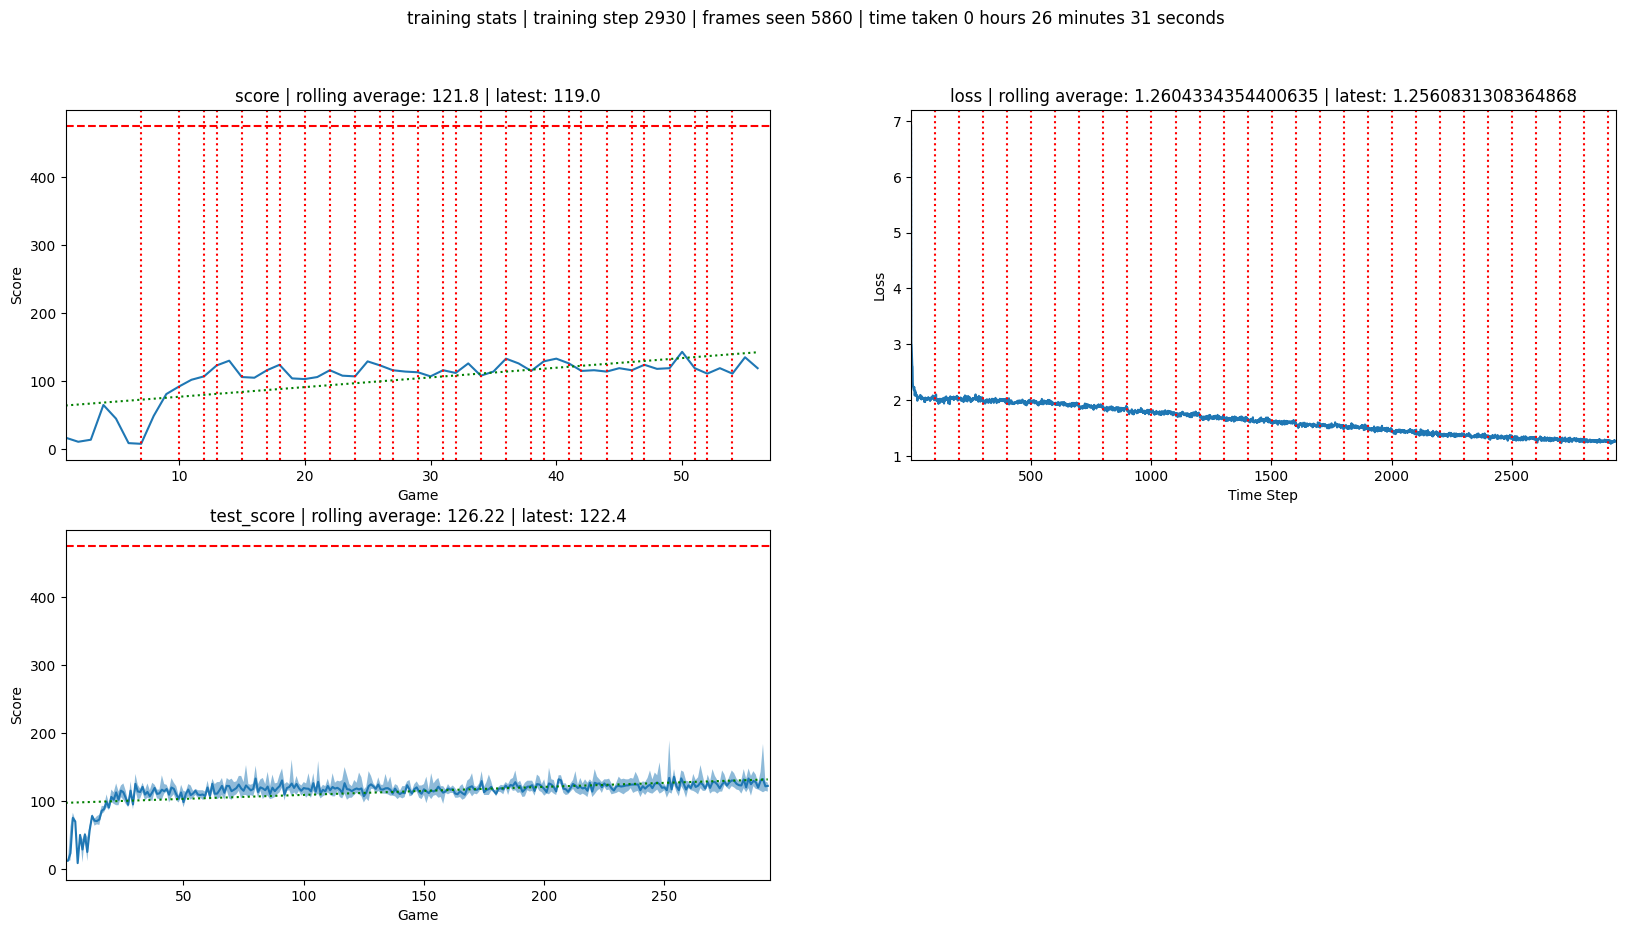

In [5]:
from agent_configs import RainbowConfig
from game_configs import CartPoleConfig
config = RainbowConfig(config, CartPoleConfig())
# train
agent = RainbowAgent(env, config, "RainbowDQN-{}".format(env.unwrapped.spec.id))
agent.checkpoint_interval = 10
agent.train()

In [ ]:
import gymnasium as gym
import gym_anytrading
import tensorflow as tf

env = gym.make('forex-v0')
# env = gym.make('stocks-v0')


In [ ]:
from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK, STOCKS_GOOGL

custom_env = gym.make(
    'forex-v0',
    df=FOREX_EURUSD_1H_ASK,
    window_size=10,
    frame_bound=(10, 300),
    unit_side='right'
)

# custom_env = gym.make(
#     'stocks-v0',
#     df=STOCKS_GOOGL,
#     window_size=10,
#     frame_bound=(10, 300)
# )


In [ ]:
print("env information:")
print("> shape:", env.unwrapped.shape)
print("> df.shape:", env.unwrapped.df.shape)
print("> prices.shape:", env.unwrapped.prices.shape)
print("> signal_features.shape:", env.unwrapped.signal_features.shape)
print("> max_possible_profit:", env.unwrapped.max_possible_profit())

print()
print("custom_env information:")
print("> shape:", custom_env.unwrapped.shape)
print("> df.shape:", custom_env.unwrapped.df.shape)
print("> prices.shape:", custom_env.unwrapped.prices.shape)
print("> signal_features.shape:", custom_env.unwrapped.signal_features.shape)
print("> max_possible_profit:", custom_env.unwrapped.max_possible_profit())


In [ ]:
observation, info = env.reset()
env.render()

env = custom_env
observation, info = env.reset()
env.render()

In [ ]:
from rainbow_agent import RainbowAgent
from agent_configs import RainbowConfig
from game_configs import CartPoleConfig
config_dict = {
    "activation": "relu",
    "kernel_initializer": "orthogonal",
    "min_replay_buffer_size": 32,
    "loss_function": tf.keras.losses.KLDivergence(),
    "learning_rate": 0.000001,
}
config = RainbowConfig(config_dict, CartPoleConfig())
# train
agent = RainbowAgent(env, config, "RainbowDQN-{}".format(env.unwrapped.spec.id))
agent.train()